In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#veri tanıyoruz

In [11]:
df = pd.read_csv("2020-2025.csv")
info = df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    object 
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ KB


In [12]:
df.head()

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


In [13]:
# Eksik değerlerin sayısı
df.isnull().sum()


Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64

In [14]:
# Eksik değerlerin yüzde oranı
(df.isnull().sum() / len(df)) * 100


Country    0.000000
2020       0.000000
2021       1.020408
2022       1.020408
2023       1.020408
2024       2.040816
2025       3.571429
dtype: float64

In [16]:
# Hangi yıl hangi ülkede maksimum değer var
df.set_index("Country").idxmax()



2020    United States
2021    United States
2022    United States
2023    United States
2024    United States
2025    United States
dtype: object

In [17]:
# Hangi yıl hangi ülkede minimum değer var
df.set_index("Country").idxmin()


2020    Tuvalu
2021    Tuvalu
2022    Tuvalu
2023    Tuvalu
2024    Tuvalu
2025    Tuvalu
dtype: object

In [18]:
# 4. Yıllara göre toplam değerler
df.drop("Country", axis=1).sum()


2020     85826173.0
2021     97843985.0
2022    101948238.0
2023    106431753.0
2024    110531918.0
2025    113237734.0
dtype: float64

In [19]:
# Yıllara göre ortalama değerler
df.drop("Country", axis=1).mean()


2020    437888.637755
2021    504350.438144
2022    525506.381443
2023    548617.283505
2024    575687.072917
2025    599141.449735
dtype: float64

In [20]:
# 5. En çok artış yaşayan ülkeler
df_diff = df.copy()
df_diff["Change_2020_2025"] = df_diff["2025"] - df_diff["2020"]
df_diff.sort_values(by="Change_2020_2025", ascending=False).head(5)


,Country,2020,2021,2022,2023,2024,2025,Change_2020_2025
186,United States,21354125,23681175.0,26006900.0,27720725.0,29184900.0,30507217.0,9153092.0
36,China,15103357,18190803.0,18307816.0,18270351.0,18748009.0,19231705.0,4128348.0
77,India,2674852,3167271.0,3346107.0,3638490.0,3909097.0,4187017.0,1512165.0
185,United Kingdom,2698705,3144079.0,3125404.0,3371118.0,3644636.0,3839180.0,1140475.0
64,Germany,3936989,4351188.0,4166872.0,4527009.0,4658526.0,4744804.0,807815.0


In [21]:
# 6. En çok düşüş yaşayan ülkeler
df_diff.sort_values(by="Change_2020_2025", ascending=True).head(5)


,Country,2020,2021,2022,2023,2024,2025,Change_2020_2025
85,Japan,5054069,5039148.0,4262146.0,4213167.0,4026211.0,4186431.0,-867638.0
127,Nigeria,432299,441074.0,476468.0,363816.0,187640.0,188271.0,-244028.0
51,Egypt,382525,423300.0,475231.0,393828.0,383109.0,347342.0,-35183.0
165,Sudan,35237,35142.0,33517.0,36998.0,28270.0,31506.0,-3731.0
193,Yemen,20220,19394.0,23534.0,19412.0,19101.0,17401.0,-2819.0


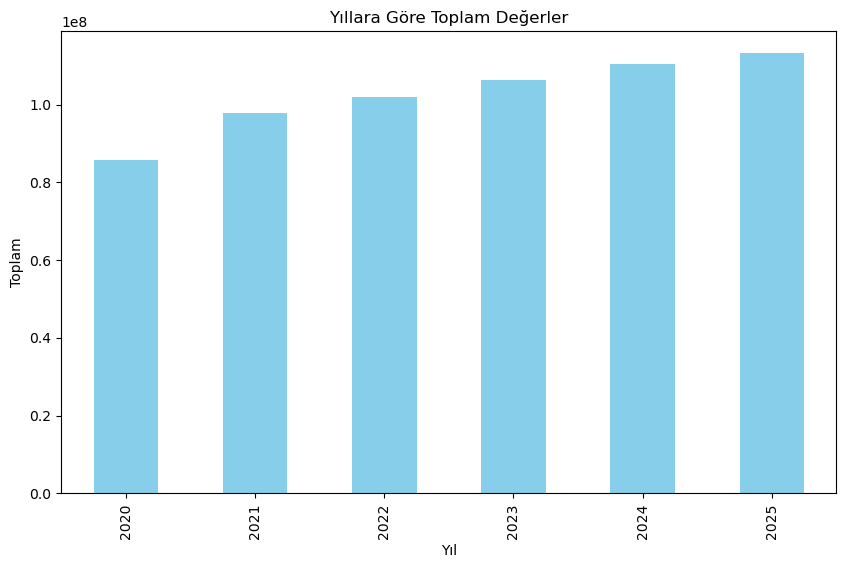

In [22]:

# Yıllara göre toplam değerler
plt.figure(figsize=(10,6))
df.drop("Country", axis=1).sum().plot(kind="bar", color="skyblue")
plt.title("Yıllara Göre Toplam Değerler")
plt.ylabel("Toplam")
plt.xlabel("Yıl")
plt.show()


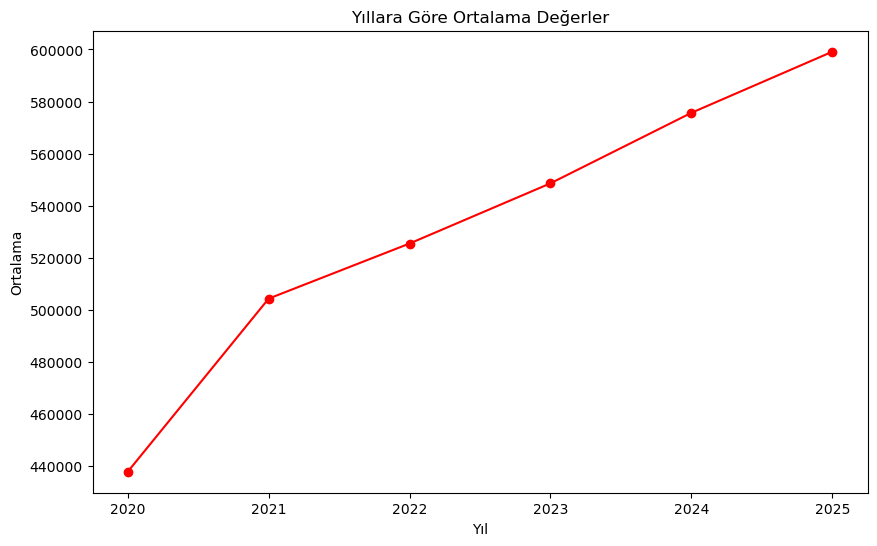

In [23]:
# Yıllara göre ortalama değerler
plt.figure(figsize=(10,6))
df.drop("Country", axis=1).mean().plot(marker="o", color="red")
plt.title("Yıllara Göre Ortalama Değerler")
plt.ylabel("Ortalama")
plt.xlabel("Yıl")
plt.show()


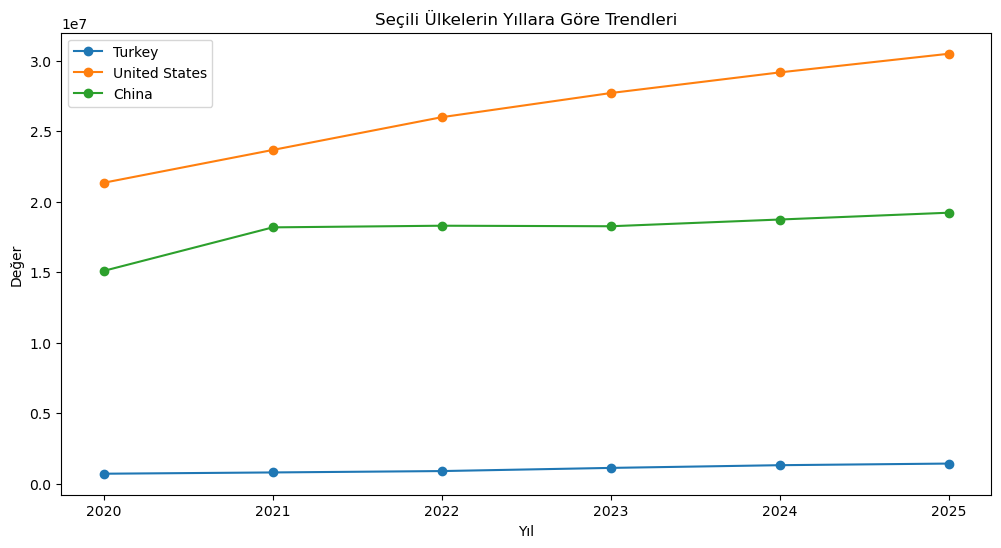

In [24]:

countries_to_plot = ["Turkey", "United States", "China"]
plt.figure(figsize=(12,6))
for country in countries_to_plot:
    plt.plot(df.columns[1:], df[df["Country"]==country].iloc[0,1:], marker="o", label=country)
plt.title("Seçili Ülkelerin Yıllara Göre Trendleri")
plt.xlabel("Yıl")
plt.ylabel("Değer")
plt.legend()
plt.show()


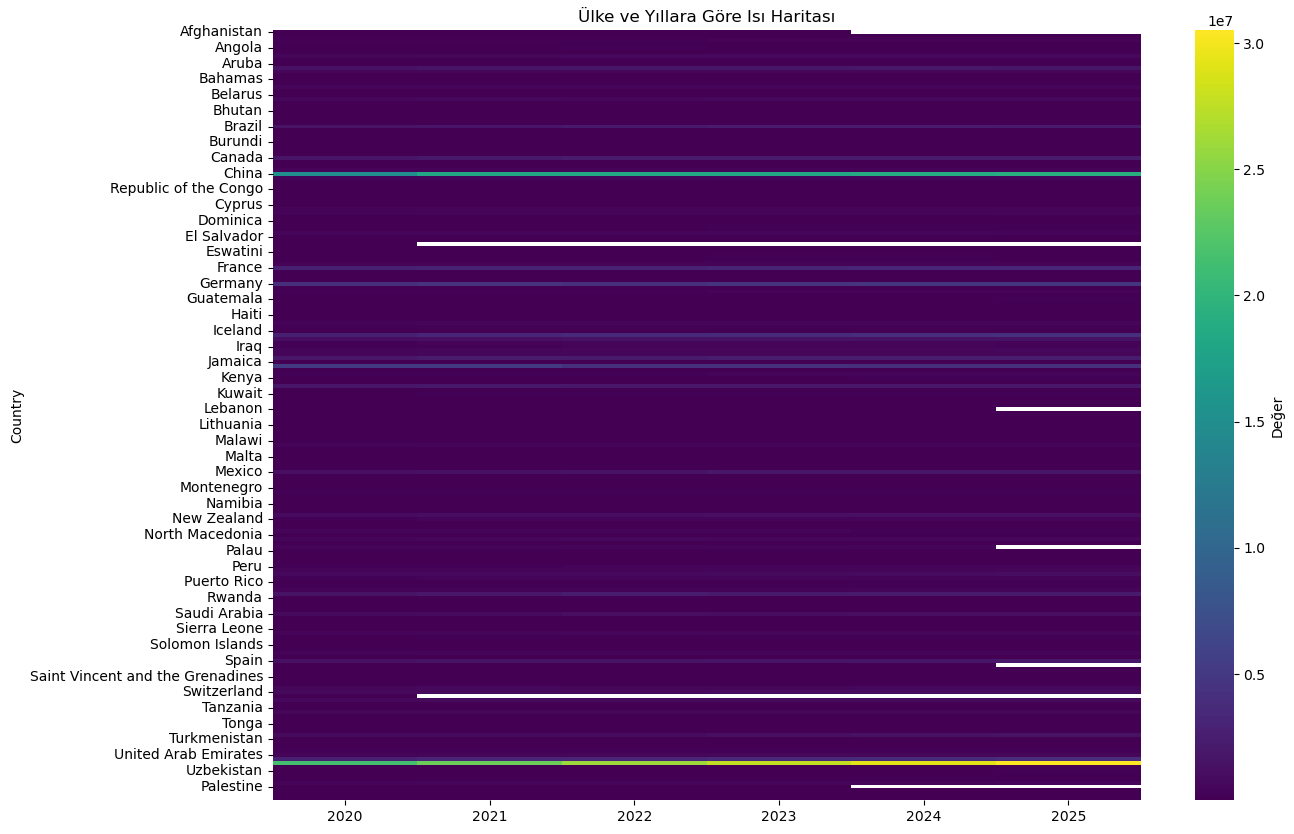

In [25]:
# Isı haritası
plt.figure(figsize=(14,10))
sns.heatmap(df.set_index("Country"), cmap="viridis", cbar_kws={'label': 'Değer'})
plt.title("Ülke ve Yıllara Göre Isı Haritası")
plt.show()
